In [1]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas
pandas.set_option('display.max_colwidth',1000)

In [2]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [3]:
VANIDL_DIR="/g/g92/haridev/project/vanidl/src"
sys.path.insert(0, VANIDL_DIR)
warnings.filterwarnings('ignore')

import vanidl
print(vanidl.__file__)

/g/g92/haridev/project/vanidl/src/vanidl/__init__.py


In [4]:
from vanidl.analyzer import VaniDL
profile = VaniDL()

In [5]:
os.environ["DARSHAN_DIR"] = "/p/gpfs1/haridev/software/spack/opt/spack/linux-rhel7-power9le/gcc-8.3.1/darshan-util-3.3.1-fifnuowfowuyjecyqzpzs62tz5rzjc7l"

In [10]:
!rm /tmp/temp_analysis/jag_small_32*

In [11]:
DATAPATH_INCLUDES = ['/p/gpfs1/brainusr/datasets']
status = profile.Load("/g/g92/haridev/project/taxonomy/analysis/logs/lbann/jag_small_32.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

[============================================================] 100.0% 1228 of 1228 Parsing DXT File 
[============================================================] 100.0% 173 of 173 Parsing Darshan File 
Darshan Trace loaded Successfully!


In [12]:
df = profile.GetDXTAsDF()

In [13]:
df['Filename'].unique()

[], Categories (0, object): []

In [19]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} MB".format(float(summary['total_io_bytes'])/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['total'])/1024.0/1024.0/1024.0))
print("\tMin,Max\t\t\t:\t{:0.3f} GB and {:0.3f} GB".format(float(summary['file_used_summary']['size']['min'])/1024.0/1024.0/1024.0,float(summary['file_used_summary']['size']['max'])/1024.0/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['mean'])/1024.0/1024.0/1024.0))



Data Access Summary (from Darshan):
Total Job time			:	2740.00 seconds
Time spent in I/O		:	0.03 seconds
% Time spent in I/O		:	0.00%
Total Data Accessed		:	11471.65 MB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['read']
# of files used			:	1
# of MPI Ranks			:	128 ranks
Data Transfer size:
	Min,Max			:	10089650 bytes and 16777216 bytes
	Average			:	15662622 bytes
	Median			:	16777216 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	1300559380 B/s and 10000 MB/s
	Average			:	4872 MB/s
	Median			:	5064 MB/s
Access Pattern:
	Sequential		:	83.33%
	Consecutive		:	83.33%


Files Summary:
File Types			:	['npy']
Dataset Size:
	Total			:	0.088 GB
	Min,Max			:	0.088 GB and 0.088 GB
	Average			:	0.088 GB


In [18]:
summary

{'type': 'full',
 'job_time': 2740.0,
 'total_io_time': 0.02734687499999988,
 'total_io_bytes': 12028893440,
 'io_interface_used': array(['X_POSIX'], dtype=object),
 'io_operations_used': array(['read'], dtype=object),
 'files_used': ['/p/gpfs1/brainusr/datasets/zinc/moses_zinc_train250K.npy'],
 'num_ranks': 128,
 'data_transfer_size': {'min': 10089650,
  'max': 16777216,
  'mean': 15662621.666666666,
  'median': 16777216.0},
 'data_transfer_bandwidth': {'min': 1300559379.8447688,
  'max': 10485760000.001154,
  'mean': 5108908565.138871,
  'median': 5310342105.255675},
 'access_pattern': {'total_operations': 768,
  'sequential': 83.33333333333333,
  'consecutive': 83.33333333333333},
 'file_used_summary': {'types': array(['npy'], dtype=object),
  'size': {'total': 93975730.0,
   'min': 93975730.0,
   'max': 93975730.0,
   'mean': 93975730.0,
   'median': 93975730.0}}}

In [20]:
df

,Module,Filename,Rank,Operation,Segment,Offset,Length,Start,End,io_time,bandwidth,ext
344,X_POSIX,/p/gpfs1/brainusr/datasets/zinc/moses_zinc_train250K.npy,0,read,0,0,16777216,18.2962,18.3056,0.0094,1.78481e+09,npy
345,X_POSIX,/p/gpfs1/brainusr/datasets/zinc/moses_zinc_train250K.npy,0,read,1,16777216,16777216,18.5047,18.5143,0.0096,1.74763e+09,npy
346,X_POSIX,/p/gpfs1/brainusr/datasets/zinc/moses_zinc_train250K.npy,0,read,2,33554432,16777216,18.7084,18.7113,0.0029,5.78525e+09,npy
347,X_POSIX,/p/gpfs1/brainusr/datasets/zinc/moses_zinc_train250K.npy,0,read,3,50331648,16777216,18.9124,18.915,0.0026,6.45278e+09,npy
348,X_POSIX,/p/gpfs1/brainusr/datasets/zinc/moses_zinc_train250K.npy,0,read,4,67108864,16777216,19.1164,19.1194,0.003,5.59241e+09,npy
...,...,...,...,...,...,...,...,...,...,...,...,...
51411,X_POSIX,/p/gpfs1/brainusr/datasets/zinc/moses_zinc_train250K.npy,127,read,1,16777216,16777216,18.4733,18.4795,0.0062,2.706e+09,npy
51412,X_POSIX,/p/gpfs1/brainusr/datasets/zinc/moses_zinc_train250K.npy,127,read,2,33554432,16777216,18.6642,18.6664,0.0022,7.62601e+09,npy
51413,X_POSIX,/p/gpfs1/brainusr/datasets/zinc/moses_zinc_train250K.npy,127,read,3,50331648,16777216,18.8518,18.8538,0.002,8.38861e+09,npy
51414,X_POSIX,/p/gpfs1/brainusr/datasets/zinc/moses_zinc_train250K.npy,127,read,4,67108864,16777216,19.0483,19.0513,0.003,5.59241e+09,npy


In [21]:
for rank in df['Rank'].unique()[:16]:
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank 0: 89.62 MB
I/O performed by rank 1: 89.62 MB
I/O performed by rank 2: 89.62 MB
I/O performed by rank 3: 89.62 MB
I/O performed by rank 4: 89.62 MB
I/O performed by rank 5: 89.62 MB
I/O performed by rank 6: 89.62 MB
I/O performed by rank 7: 89.62 MB
I/O performed by rank 8: 89.62 MB
I/O performed by rank 9: 89.62 MB
I/O performed by rank 10: 89.62 MB
I/O performed by rank 11: 89.62 MB
I/O performed by rank 12: 89.62 MB
I/O performed by rank 13: 89.62 MB
I/O performed by rank 14: 89.62 MB
I/O performed by rank 15: 89.62 MB


In [23]:
for file in df['Filename'].unique():
    print("I/O performed on file {}: {:0.2f} MB".format(file,float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

I/O performed on file /p/gpfs1/brainusr/datasets/zinc/moses_zinc_train250K.npy: 11471.65 MB


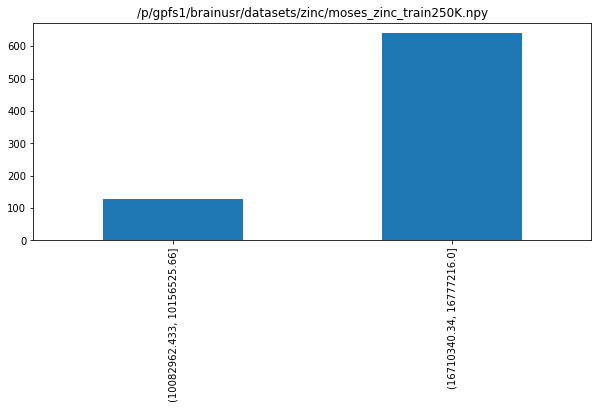

In [22]:
for file in df['Filename'].unique():
    tl = profile.GetIORequestDistribution(filepath=file)
    tl.plot(kind='bar', figsize=(10, 4), title=file)
    plt.show()

[============================================================] 100.0% 768 of 768 Creating Timeline 


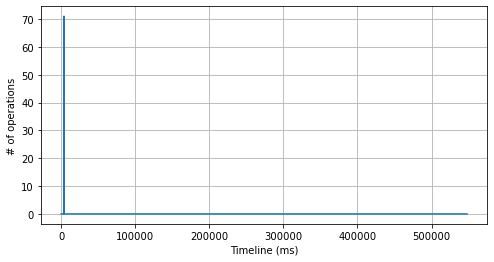

In [24]:
tl = profile.CreateIOTimeline()
plt.figure(figsize=(8,4))
plt.grid()
plt.ylabel("# of operations")
plt.xlabel("Timeline (ms)")
plt.plot(tl['time_step'], tl['operation_count']);